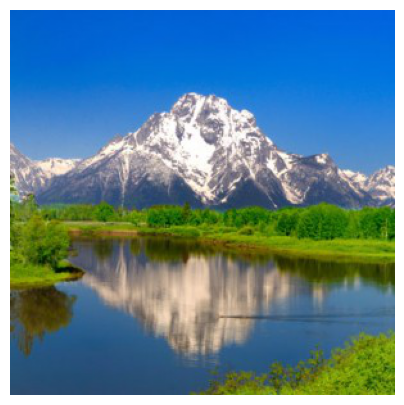

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

image_path = 'image.jpg'
img = imread(image_path)
img_RGB = [np.array(img[:,:,i], dtype = np.float64)/255 for i in range(3)]

def plot_image(RGB, ax = None):
    if ax is None:
        _, ax = plt.subplots(1,1, figsize = (12,5))
    ax.imshow(np.clip(np.stack(RGB, axis = 2),0,1))
    plt.axis('off')
plot_image(img_RGB)

In [13]:
damage_fraction = 0.7
np.random.seed(0)

mask_remove = np.random.choice(
    a=[True, False],
    size=(img.shape[0], img.shape[1]),
    p=[damage_fraction, 1 - damage_fraction],
)

mask_keep = np.logical_not(mask_remove)

img_damaged_RGB = [img_RGB[i].copy() for i in range(3)]

for i in range(3):
    img_damaged_RGB[i][mask_remove] = np.random.rand(np.sum(mask_remove))

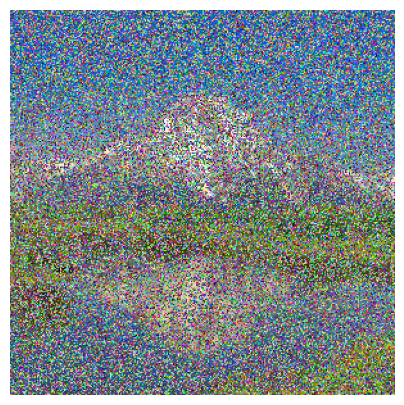

In [14]:
# Plot the damaged image
plot_image(img_damaged_RGB)

In [15]:
X_full = img_damaged_RGB[0]
vals_test = X_full[mask_remove]

In [16]:
X_full.shape

(300, 300)

In [17]:
n_max_iter = 100
threshold = 100.0
tolerance = 1e-6
RMSE_SVT_history = []


X_hat = X_full.copy()
for k in range(n_max_iter):
    X_hat_old = X_hat.copy()
    U, s, VT = np.linalg.svd(X_hat, full_matrices=False)
    s[s < threshold] = 0
    X_hat = U @ np.diag(s) @ VT
    X_hat[mask_keep] = X_full[mask_keep]
    increment = np.linalg.norm(X_hat - X_hat_old)

    vals_test_SVT = X_hat[mask_remove]
    RMSE_SVT = np.sqrt(np.mean((vals_test - vals_test_SVT) ** 2))

    RMSE_SVT_history.append(RMSE_SVT)

    print("======= iteration %d (increment %1.2e)" % (k, increment))
    print("RMSE = %f" % RMSE_SVT)

    if increment < tolerance:
        break

======= iteration 0 (increment 7.54e+01)
RMSE = 0.300422
======= iteration 1 (increment 1.52e+01)
RMSE = 0.322941
======= iteration 2 (increment 1.08e+01)
RMSE = 0.344347
======= iteration 3 (increment 7.66e+00)
RMSE = 0.361713
======= iteration 4 (increment 5.46e+00)
RMSE = 0.374955
======= iteration 5 (increment 3.91e+00)
RMSE = 0.384771
======= iteration 6 (increment 2.81e+00)
RMSE = 0.391946
======= iteration 7 (increment 2.02e+00)
RMSE = 0.397154
======= iteration 8 (increment 1.47e+00)
RMSE = 0.400923
======= iteration 9 (increment 1.07e+00)
RMSE = 0.403649
======= iteration 10 (increment 7.82e-01)
RMSE = 0.405620
======= iteration 11 (increment 5.75e-01)
RMSE = 0.407047
======= iteration 12 (increment 4.25e-01)
RMSE = 0.408082
======= iteration 13 (increment 3.16e-01)
RMSE = 0.408834
======= iteration 14 (increment 2.36e-01)
RMSE = 0.409381
======= iteration 15 (increment 1.77e-01)
RMSE = 0.409781
======= iteration 16 (increment 1.33e-01)
RMSE = 0.410073
======= iteration 17 (in

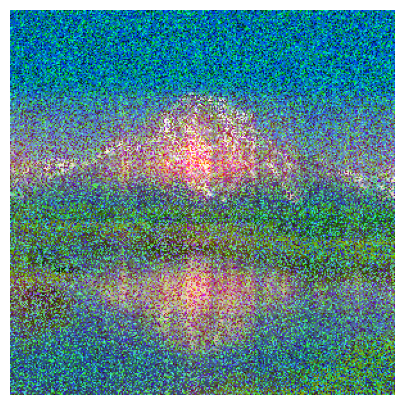

In [18]:
# Plot the recovered image
plot_image([X_hat, img_damaged_RGB[1], img_damaged_RGB[2]])

======= iteration 0 (increment 1.45e+02)
RMSE = 0.579309
======= iteration 1 (increment 0.00e+00)
RMSE = 0.579309
======= iteration 0 (increment 7.25e+01)
RMSE = 0.288837
======= iteration 1 (increment 5.57e+00)
RMSE = 0.292095
======= iteration 2 (increment 3.93e+00)
RMSE = 0.295363
======= iteration 3 (increment 2.79e+00)
RMSE = 0.298145
======= iteration 4 (increment 2.00e+00)
RMSE = 0.300351
======= iteration 5 (increment 1.44e+00)
RMSE = 0.302040
======= iteration 6 (increment 1.04e+00)
RMSE = 0.303307
======= iteration 7 (increment 7.55e-01)
RMSE = 0.304248
======= iteration 8 (increment 5.52e-01)
RMSE = 0.304942
======= iteration 9 (increment 4.05e-01)
RMSE = 0.305452
======= iteration 10 (increment 2.99e-01)
RMSE = 0.305826
======= iteration 11 (increment 2.21e-01)
RMSE = 0.306101
======= iteration 12 (increment 1.64e-01)
RMSE = 0.306303
======= iteration 13 (increment 1.22e-01)
RMSE = 0.306451
======= iteration 14 (increment 9.11e-02)
RMSE = 0.306560
======= iteration 15 (incr

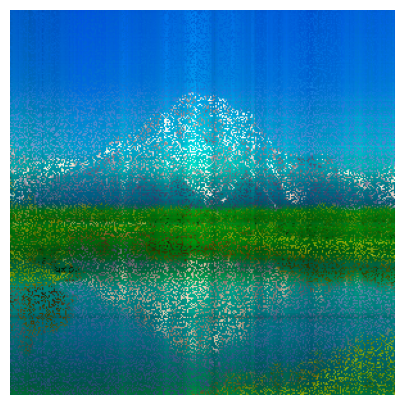

In [24]:
import numpy as np
import matplotlib.pyplot as plt


def svt(
    X_full,
    mask_keep,
    mask_remove,
    vals_test,
    n_max_iter=100,
    threshold=100.0,
    tolerance=1e-6,
):
    X_hat = X_full.copy()
    RMSE_SVT_history = []

    for k in range(n_max_iter):
        X_hat_old = X_hat.copy()
        U, s, VT = np.linalg.svd(X_hat, full_matrices=False)
        s[s < threshold] = 0
        X_hat = U @ np.diag(s) @ VT
        X_hat[mask_keep] = X_full[mask_keep]
        increment = np.linalg.norm(X_hat - X_hat_old)

        vals_test_SVT = X_hat[mask_remove]
        RMSE_SVT = np.sqrt(np.mean((vals_test - vals_test_SVT) ** 2))

        RMSE_SVT_history.append(RMSE_SVT)

        print("======= iteration %d (increment %1.2e)" % (k, increment))
        print("RMSE = %f" % RMSE_SVT)

        if increment < tolerance:
            break

    return X_hat, RMSE_SVT_history


# Implement the singular value truncation (SVT) algorithm to reconstruct the picture from img damaged RGB.
# (Hint: apply the algorithm independently to each channel.)
recovered_images_channels = []
for channel in range(3):
    X_full = img_damaged_RGB[channel]
    vals_test = X_full[mask_remove]

    X_hat, RMSE_SVT_history = svt(
        X_full,
        mask_keep,
        mask_remove,
        vals_test,
        n_max_iter=20,
        threshold=140.0,
        tolerance=1e-6,
    )
    recovered_images_channels.append(X_hat)

# Plot the recovered image
plot_image(recovered_images_channels)

Singular Value Filtering: SVT works by setting singular values below the threshold to zero. Singular values in a matrix decomposition (like SVD) represent the "importance" of certain features in the data. A higher singular value corresponds to a feature that contributes more significantly to the structure of the data. By setting a threshold, you effectively filter out less significant features

Lower Threshold: Setting a lower threshold retains more singular values, which means preserving more details of the original image, including potentially noise or finer details. This might be preferable for images where detail is crucial but could also retain more of the damage or noise if the original image was corrupted.
Higher Threshold: A higher threshold results in more singular values being discarded. This can be useful for noise reduction or if the image is significantly damaged, as it tends to produce a "cleaner" image. However, the trade-off is that some important details might be lost, leading to a more blurred or oversimplified image.